# 주성분 분석
## 차원과 차원 축소
- 과일 사진은 10,000개의 픽셀이 있으므로 10,000개의 특성이 있는 셈이다.
- 10,000개의 특성은 결국 10,000개의 차원이 있다는 것이고, 이 차원을 줄인다는건 저장 공간을 절약한다는것이다.

### 차원 축소
- 데이터 크기를 줄여 과대적합을 줄이고 학습 모델의 성능을 높일 수 있다.
- 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이며 복원이 가능하다.
- 주성분 분석(PCA)을 배운다.

#### 주성분 분석
- 데이터의 분산(Variance)이 가장 큰 방향을 찾아서 새로운 축을 형성하고, 그 축을 기준으로 데이터를 변환하는 방식
- https://ddongwon.tistory.com/114


In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2025-03-21 13:00:23--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-03-21 13:00:23--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-03-21 13:00:24--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

In [2]:
from sklearn.decomposition import PCA

# 주성분의 개수 지정을 위해 n_components를 지정한다.
pca = PCA(n_components=50)
# 비지도 학습이기 때문에 fit() 메서드에 타겟값을 제공하지 않음
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
# 배열의 크기 확인
print(pca.components_.shape)

(50, 10000)


- n_components=50으로 지정했기 때문에 배열의 첫 번째 차원이 50이다. -> 50개의 주성분을 찾은것이다.
- 두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000개이다.

In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

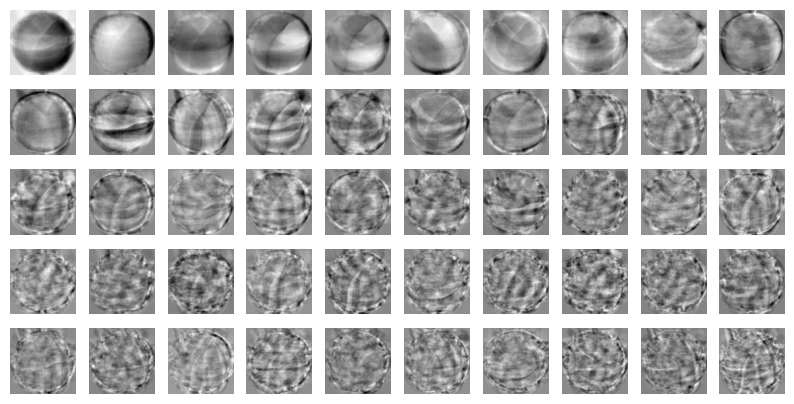

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

- 위 데이터는 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타내는 것.
- 한편으론 데이터셋에 있는 어떤 특징을 잡아낸것이라 생각할 수 있다.

- 주성분을 찾았으므로 원본 데이터를 주성분에 투영해 특성의 수 개수를 10,000개에서 50개로 줄일 수 있다.
  - 원본 데이터를 각 주성분으로 분해하는 것으로 생각할 수 있다.
  - PCA의 transform() 메서드를 사용해 원본 데이터의 차원을 줄일 수 있다.

In [7]:
print(fruits_2d.shape)

(300, 10000)


In [8]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- fruits_2d는 (300, 10000) 크기의 배열이였다. 10000개의 특성을 가진 300개의 이미지이다.
- 50개의 주성분을 찾은 PCA 모델을 사용해 이를 (300, 50) 크기의 배열로 변환했다.

## 원본 데이터 재구성
- 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있다.
- inverse_transform() 메서드를 사용한다.

In [9]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


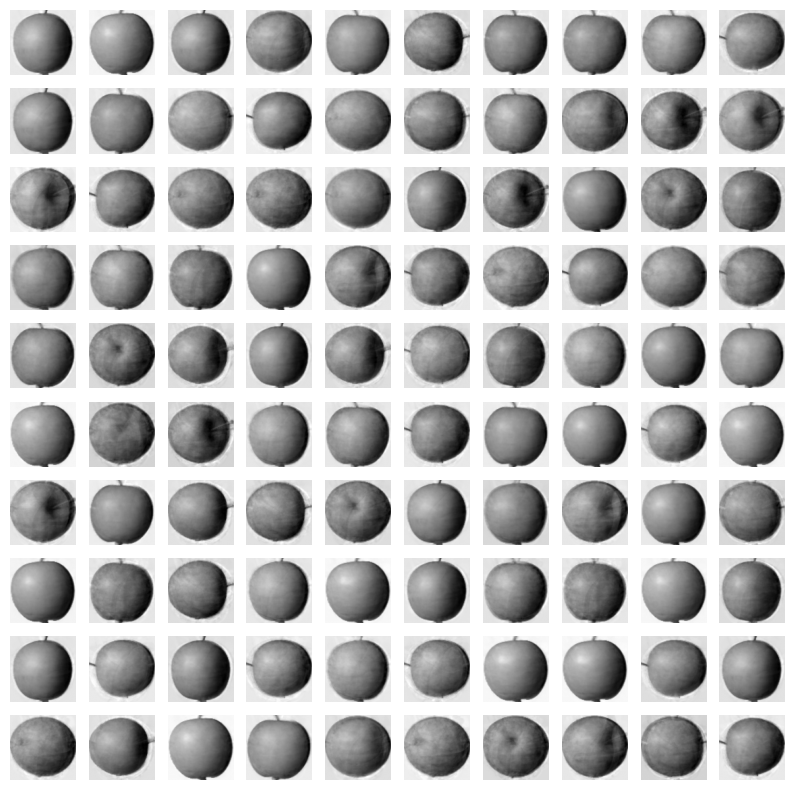

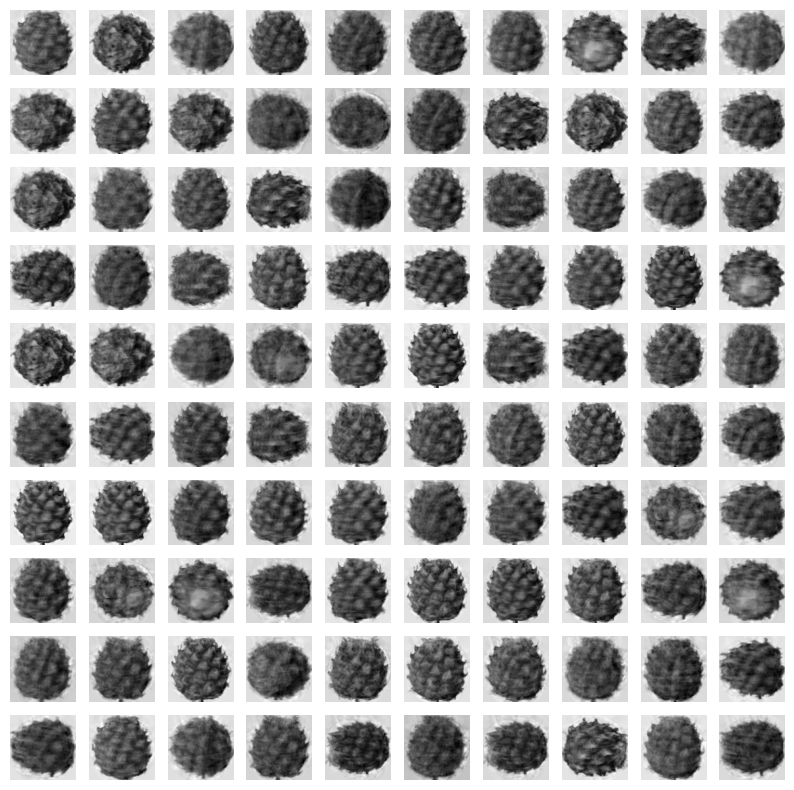

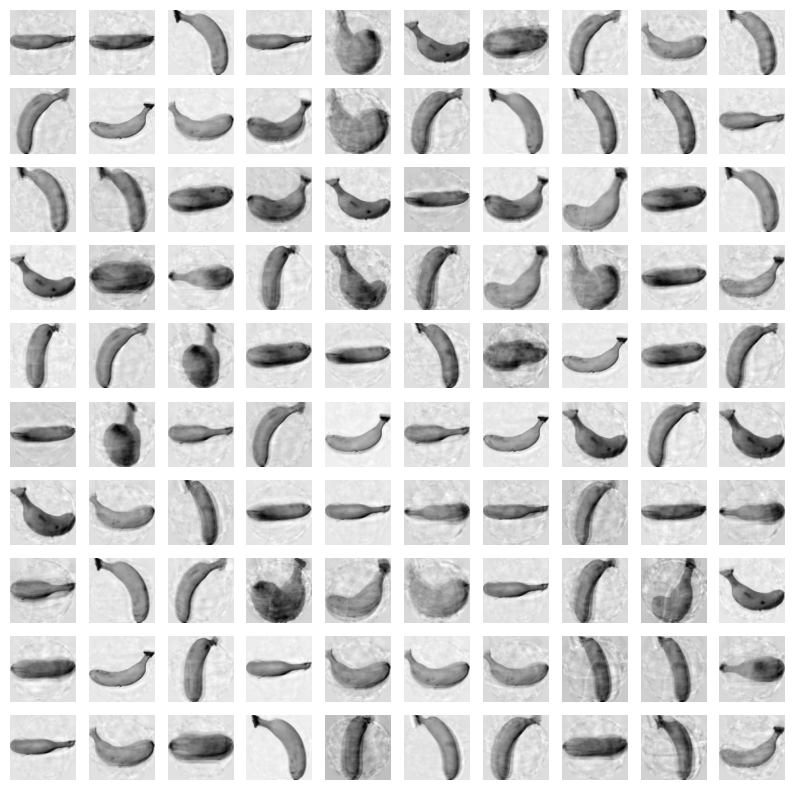

In [10]:
# 출력
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
- PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어있다.
- 이 분산 비율을 모두 더하면 총 분산 비율을 얻을 수 있다.

In [11]:
## 설명된 분산
print(np.sum(pca.explained_variance_ratio_))

0.9215443115819962


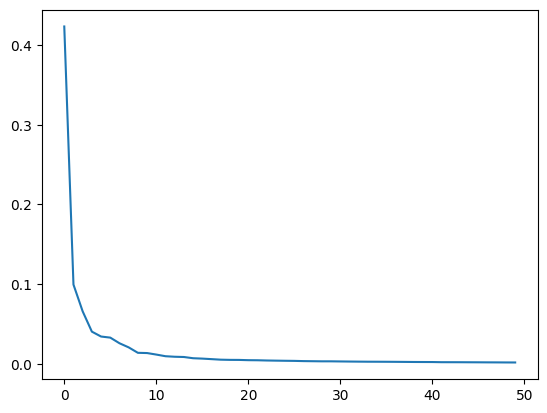

In [12]:
# 분산 그래프 출력
plt.plot(pca.explained_variance_ratio_)
plt.show()

## 다른 알고리즘과 함께 사용하기
- 과일 사진 원본 데이터와 PCA로 축소한 데이터를 로지스틱 회귀 모델로 확인

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [14]:
# 타깃값 지정, 사과0, 파인애플1, 바나나2로 지정.
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [16]:
from sklearn.model_selection import cross_validate

# cross_validate를 통해 fruits_2d, target를 교차검증해 lr로 학습한다.
scores = cross_validate(lr, fruits_2d, target)

# 평균 확인
print(np.mean(scores['test_score']))
# 시간 확인
print(np.mean(scores['fit_time']))

0.9966666666666667
1.2939912796020507


In [17]:
# cross_validate를 통해 fruits_pca, target를 교차검증해 lr로 학습한다.
scores = cross_validate(lr, fruits_pca, target)

# 평균 확인
print(np.mean(scores['test_score']))
# 시간 확인
print(np.mean(scores['fit_time']))

0.9966666666666667
0.01100006103515625


- 머신러닝 훈련 속도를 높였다.

- 앞서 PCA 클래스를 사용할 때 n_components 매개변수에 주성분의 개수를 지정함
- 대신 원하는 설명된 분산의 비율을 입력할 수 있다.
- 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델을 만들어보자

In [18]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [19]:
# 몇 개의 주성분을 찾았는지 확인
print(pca.n_components_)

2


In [20]:
# 데이터 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [21]:
scores = cross_validate(lr, fruits_pca, target)

# 점수와 시간 확인
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.021060371398925783


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [23]:
# 차원 축소된 데이터를 사용해 K-평균 알고리즘으로 클러스터 찾아보기
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


- 각각 110, 99, 91개의 샘플을 포함하는 클러스터를 확인할 수 있다.

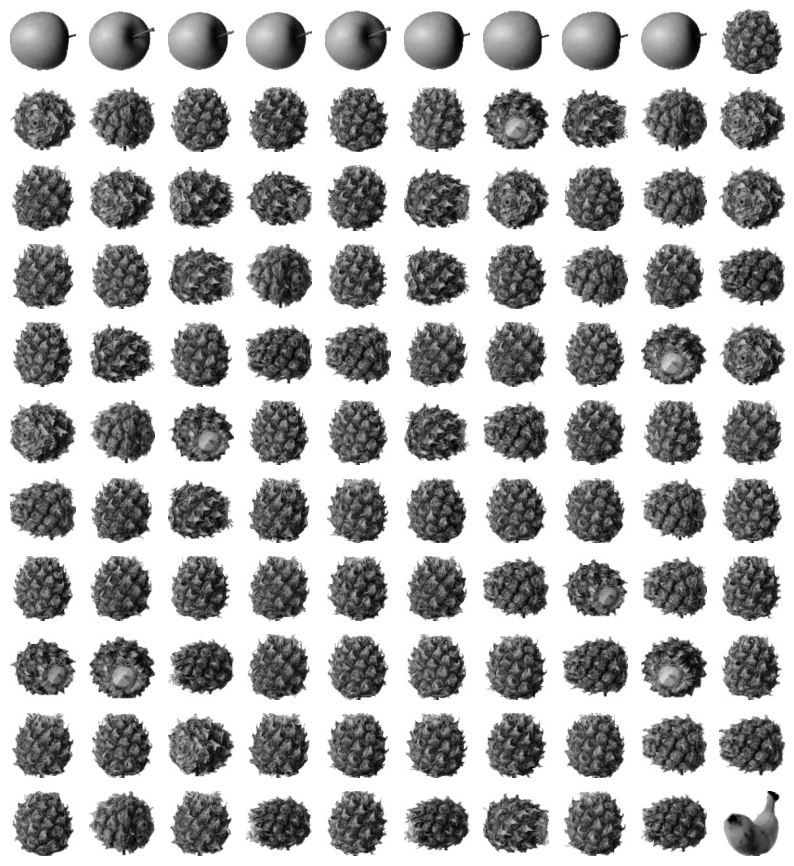

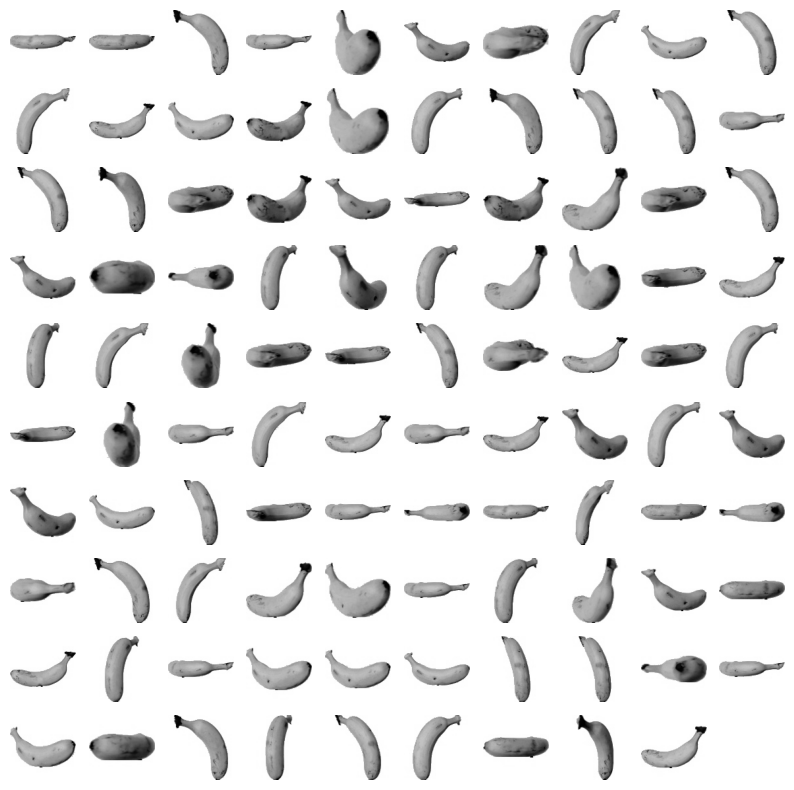

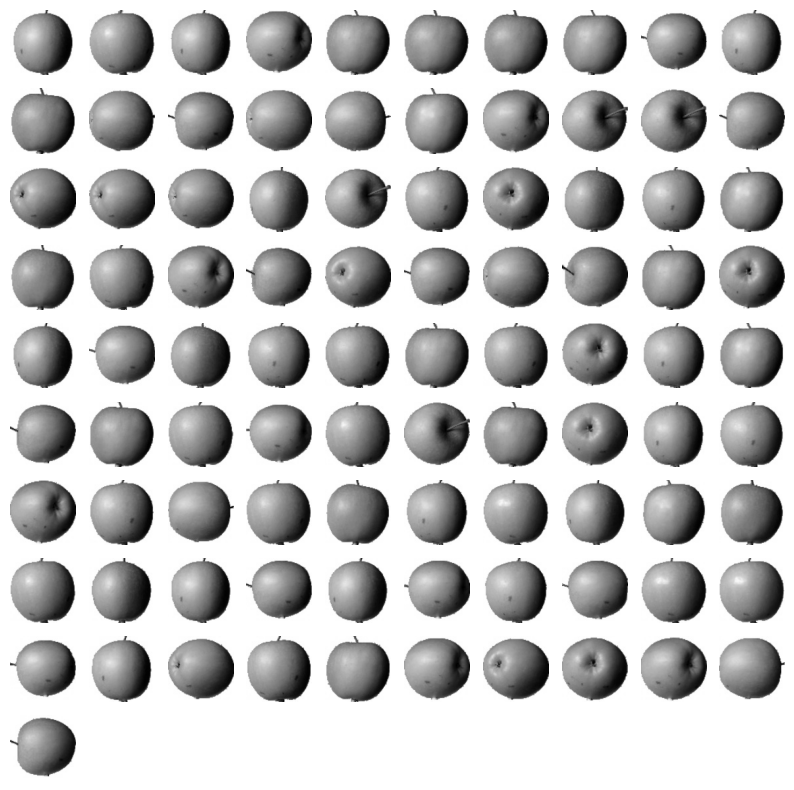

In [24]:
# 과일 이미지 확인
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

- 훈련 데이터의 차원을 줄이면 얻을 수 있는 장점은 시각화이다.
- 여기선 2개의 특성이 있으므로 2차원으로 표현할 수 있다.
- km_labels_를 사용해 클러스터별로 나누어 산점도 표현


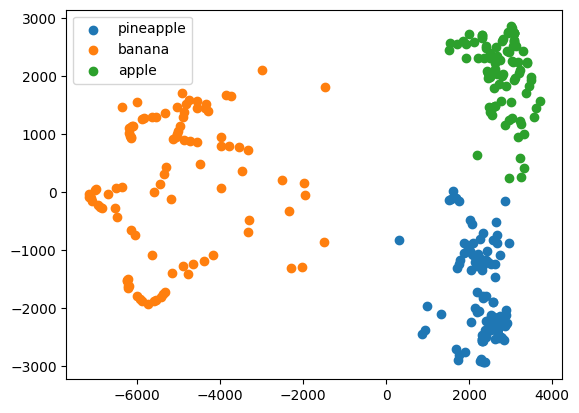

In [25]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()

- 2개의 특성만 사용해 산점도 분리에 성곡하였다.